# NOAA Methane Dataset Exploratory data analysis in Python.

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.



---



Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [2]:
df = pd.read_csv("NOAA_Methane_Data.csv")
# To display the top 5 rows 
df.head(5)               

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1625.93,2.10,1634.82,1.39
1,1983,8,1983.625,1628.07,2.69,1635.41,1.33
2,1983,9,1983.708,1638.41,2.33,1636.04,1.27
3,1983,10,1983.792,1644.74,1.59,1636.73,1.20
4,1983,11,1983.875,1642.57,0.78,1637.48,1.12


In [3]:
df.tail(5)                        # To display the botton 5 rows

,year,month,decimal,average,average_unc,trend,trend_unc
467,2022,6,2022.458,1905.55,-9.99,1911.98,-9.99
468,2022,7,2022.542,1904.70,-9.99,1913.06,-9.99
469,2022,8,2022.625,1909.01,-9.99,1914.09,-9.99
470,2022,9,2022.708,1915.77,-9.99,1915.04,-9.99
471,2022,10,2022.792,1920.34,-9.99,1915.92,-9.99




---



## 3. Checking the types of data

Here we check for the datatypes because sometimes the month could be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the year and month data is already represented in integer format.

In [4]:
df.dtypes

year             int64
month            int64
decimal        float64
average        float64
average_unc    float64
trend          float64
trend_unc      float64
dtype: object



---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as average_unc and trend_unc doesn't make any sense to me so I just dropped for this instance.

In [6]:
df = df.drop(['average_unc','trend_unc'], axis=1)
df.head(5)

,year,month,decimal,average,trend
0,1983,7,1983.542,1625.93,1634.82
1,1983,8,1983.625,1628.07,1635.41
2,1983,9,1983.708,1638.41,1636.04
3,1983,10,1983.792,1644.74,1636.73
4,1983,11,1983.875,1642.57,1637.48




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, but I didn]t change their column names. This is a good approach it improves the readability of the data set.

In [7]:
#df = df.rename(columns={"year": "column_1", "month": "column_2", "decimal": "column_3"})
df.head(5)

,year,month,decimal,average,trend
0,1983,7,1983.542,1625.93,1634.82
1,1983,8,1983.625,1628.07,1635.41
2,1983,9,1983.708,1638.41,1636.04
3,1983,10,1983.792,1644.74,1636.73
4,1983,11,1983.875,1642.57,1637.48




---



## 6. Dropping the duplicate rows

This is often a handy thing to do in a huge data set.

In [8]:
df.shape

(472, 5)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


Now let us remove the duplicate data because it's ok to remove them.

In [10]:
df.count()      # Used to count the number of rows

year       472
month      472
decimal    472
average    472
trend      472
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,year,month,decimal,average,trend
0,1983,7,1983.542,1625.93,1634.82
1,1983,8,1983.625,1628.07,1635.41
2,1983,9,1983.708,1638.41,1636.04
3,1983,10,1983.792,1644.74,1636.73
4,1983,11,1983.875,1642.57,1637.48


In [12]:
df.count()

year       472
month      472
decimal    472
average    472
trend      472
dtype: int64



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column.

In [13]:
print(df.isnull().sum())

year       0
month      0
decimal    0
average    0
trend      0
dtype: int64


In [14]:
df = df.dropna()    # Dropping the missing values.
df.count()

year       472
month      472
decimal    472
average    472
trend      472
dtype: int64

In [15]:
print(df.isnull().sum())   # After dropping the values

year       0
month      0
decimal    0
average    0
trend      0
dtype: int64




---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. 

<AxesSubplot:xlabel='decimal'>

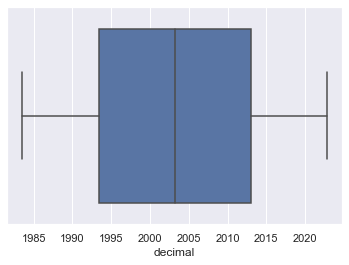

In [17]:
sns.boxplot(x=df['decimal'])

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year       19.25000
month       5.25000
decimal    19.62475
average    74.77750
trend      75.15250
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [19]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(472, 5)



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

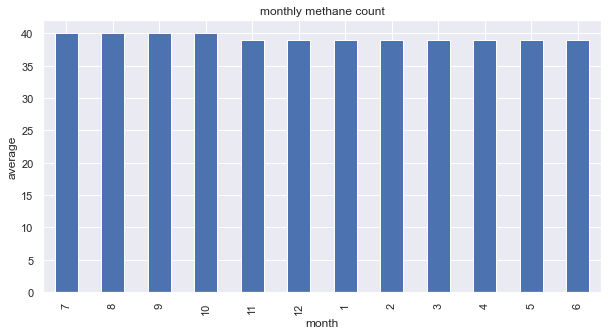

In [31]:
df.month.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))
plt.title("monthly methane count")
plt.ylabel('average')
plt.xlabel('month');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. 

,year,month,decimal,average,trend
year,1.000000,-0.029642,0.999681,0.969936,0.972672
month,-0.029642,1.000000,-0.004385,0.006587,-0.005393
decimal,0.999681,-0.004385,1.000000,0.970519,0.972954
average,0.969936,0.006587,0.970519,1.000000,0.997474
trend,0.972672,-0.005393,0.972954,0.997474,1.000000


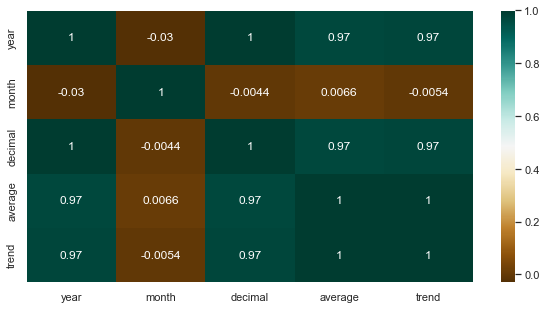

In [21]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

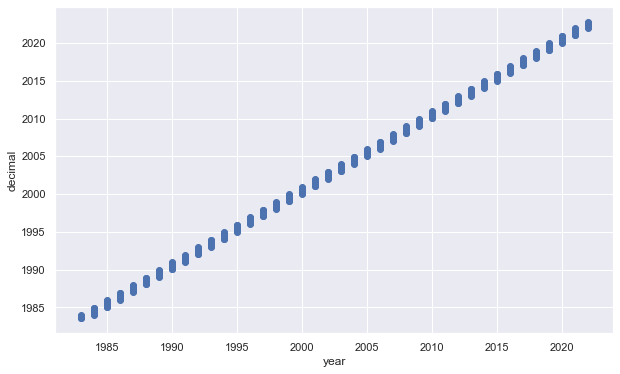

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['year'], df['decimal'])
ax.set_xlabel('year')
ax.set_ylabel('decimal')
plt.show()

**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.